<a href="https://colab.research.google.com/github/galettomatias/DS_GALETTO/blob/main/ProyectoDS_ParteI_%2BGALETTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO MACHINE LEARNING: predecir el riesgo de sufrir un derrame cerebral en pacientes

Abstract: Este proyecto de machine learning tiene como objetivo predecir el riesgo de sufrir un derrame cerebral en pacientes utilizando un conjunto de datos de salud que incluye características demográficas, de estilo de vida y médicas. Mediante la implementación de algoritmos de árboles de decisión y técnicas de imputación de datos para manejar valores faltantes, hemos identificado patrones significativos y factores de riesgo clave asociados con los derrames cerebrales. Nuestros hallazgos indican que la edad, el nivel promedio de glucosa en sangre, el índice de masa corporal (IMC), y el historial de hipertensión y enfermedades cardíacas son determinantes cruciales en la predicción de derrames cerebrales. Este modelo predictivo puede ser una herramienta valiosa para profesionales de la salud en la identificación temprana y gestión de pacientes con alto riesgo de sufrir un derrame cerebral.

Objetivo: El objetivo principal de este proyecto es desarrollar un modelo predictivo utilizando técnicas de machine learning que permita identificar a pacientes con alto riesgo de sufrir un derrame cerebral. Específicamente, buscamos:

Analizar y preprocesar el dataset para asegurar la calidad de los datos. Implementar y comparar diferentes algoritmos de machine learning, con un enfoque en los árboles de decisión. Identificar y manejar valores faltantes mediante técnicas de imputación de datos. Evaluar el rendimiento del modelo predictivo y determinar los factores más influyentes en la predicción de derrames cerebrales. Proveer recomendaciones basadas en los hallazgos para mejorar la prevención y gestión de derrames cerebrales en pacientes de alto riesgo.

Contexto Comercial: En el sector de la salud, la prevención y gestión de enfermedades es fundamental para mejorar la calidad de vida de los pacientes y reducir los costos asociados con tratamientos médicos intensivos. Los derrames cerebrales son una de las principales causas de muerte y discapacidad a nivel mundial, representando una carga significativa tanto para los pacientes como para los sistemas de salud.
El desarrollo de un modelo predictivo efectivo para identificar a pacientes con alto riesgo de sufrir un derrame cerebral tiene un valor comercial considerable. Este modelo puede ser integrado en sistemas de salud para proporcionar alertas tempranas y personalizar planes de tratamiento, mejorando así la eficacia de las intervenciones preventivas. Además, puede ayudar a las aseguradoras a diseñar productos y servicios adaptados a las necesidades de pacientes con mayor riesgo, optimizando la asignación de recursos y reduciendo los costos operativos.

Por lo tanto, este proyecto no solo tiene un impacto positivo en la salud pública, sino que también ofrece ventajas competitivas a las organizaciones de salud que adopten estas tecnologías avanzadas, promoviendo una atención más proactiva y personalizada.

CONJUNTO DE DATOS
El conjunto de datos utilizado en este proyecto proviene de un estudio de salud que recopila información sobre pacientes y su riesgo de sufrir un derrame cerebral. Cada registro en el conjunto de datos representa a un paciente único e incluye tanto características demográficas como médicas. A continuación, se detalla cada una de las columnas presentes en el dataset:

id: Un identificador único asignado a cada paciente.

gender: El género del paciente (Male/Female/Other).

age: La edad del paciente en años.

hypertension: Indica si el paciente tiene hipertensión (1) o no (0).

heart_disease: Indica si el paciente tiene alguna enfermedad cardíaca (1) o no (0).

ever_married: Indica si el paciente alguna vez ha estado casado (Yes/No).

work_type: Tipo de trabajo del paciente, clasificado en varias categorías: Private: Trabaja en el sector privado. Self-employed: Trabaja por cuenta propia. Govt_job: Empleado del gobierno. children: Niños que no trabajan. Never_worked: Nunca ha trabajado.

Residence_type: Tipo de residencia del paciente (Urban/Rural). avg_glucose_level: Nivel promedio de glucosa en sangre del paciente.

bmi: Índice de masa corporal del paciente, una medida del peso en relación con la altura.

smoking_status: Estado de fumador del paciente, clasificado en: formerly smoked: Ex-fumador. never smoked: Nunca ha fumado. smokes: Actualmente fuma. Unknown: Estado de fumador desconocido.

stroke: Indica si el paciente ha sufrido un derrame cerebral (1) o no (0).

Hipótesis de Interés

Hipótesis 1: La hipertensión y la enfermedad cardíaca están fuertemente asociadas con un mayor riesgo de sufrir un accidente cerebrovascular.

Hipótesis 2: Los pacientes con niveles elevados de glucosa en sangre y un índice de masa corporal (IMC) alto tienen un mayor riesgo de sufrir un accidente cerebrovascular.

Hipótesis 3: Los hábitos de tabaquismo y el tipo de residencia influyen en la probabilidad de sufrir un accidente cerebrovascular.

**Cargar el archivo CSV**

In [7]:
#importar librearias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#importar Dataframe y mostrar las primeras 10 filas:
df_healthcare = pd.read_csv ('https://raw.githubusercontent.com/galettomatias/DS_GALETTO/main/healthcare-dataset-stroke-data%20(1).csv') #,index_col = 0)
df_healthcare.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [9]:
#Ponemos de Index a ID
df_healthcare.set_index('id', inplace=True)
df_healthcare

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [10]:
#Shape o Forma del dataset.
df_healthcare.shape

(5110, 11)

In [11]:
#Tipo de datos en cada columna
df_healthcare.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
#Retorna solo las variables numericas, incluye varias estadísticas descriptivas, como la media, la mediana, el máximo, el mínimo, los cuartiles, etc. para cada columna
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
# Verificar si hay valores faltantes
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [14]:
#Como a la edad (age) la toma como float64 es porque hay valores con decimales, vamos a transforar los valores a enteros
# Redondear las edades al entero más cercano
df_healthcare['age'] = df_healthcare['age'].round().astype(int)




# Imprimir el DataFrame modificado
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 479.1+ KB


In [15]:
df_healthcare.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612731,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
# Cantidad de filas por columnas
df_healthcare.count()

#BMI presenta valores faltantes

gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [17]:
#Reviso el total de datos faltantes en las columnas con nulos
df_healthcare.isnull().sum()

#se confirma la ausencia de datos de esa columna

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
#CAMBIAR DATOS FALTANTE DE LA COLUMNA BMI POR LA MEDIA
# Calcular la media de columna BMI
median_bmi = df_healthcare['bmi'].median()

df_healthcare['bmi'].fillna(median_bmi, inplace=True)
df_healthcare

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [19]:
#Reviso el total de datos faltantes en las columnas con nulos
df_healthcare.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

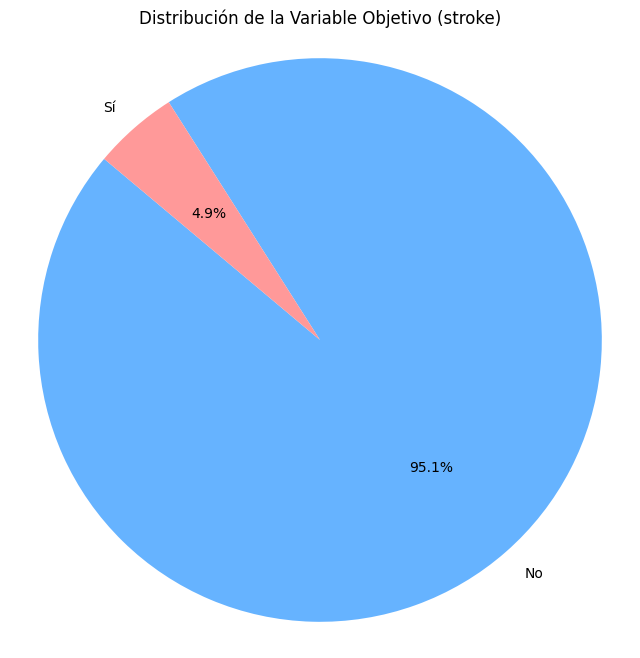

In [20]:
# Gráfico de torta de la distribución de la variable objetivo (stroke)
stroke_counts = df_healthcare['stroke'].value_counts()
stroke_labels = ['No', 'Sí']

plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribución de la Variable Objetivo (stroke)')
plt.axis('equal')  # Asegurar que el gráfico de torta es un círculo
plt.show()

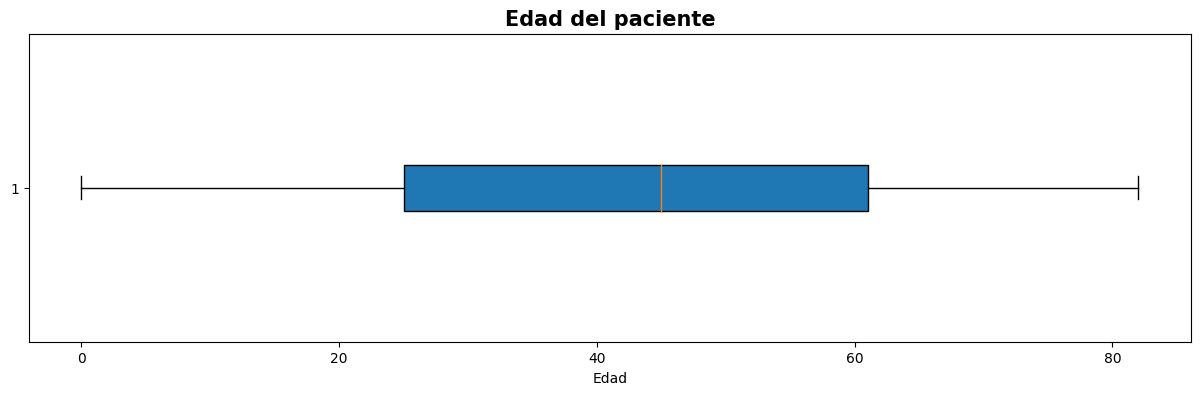

In [21]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_healthcare['age'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('Edad del paciente', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('Edad')
plt.show()

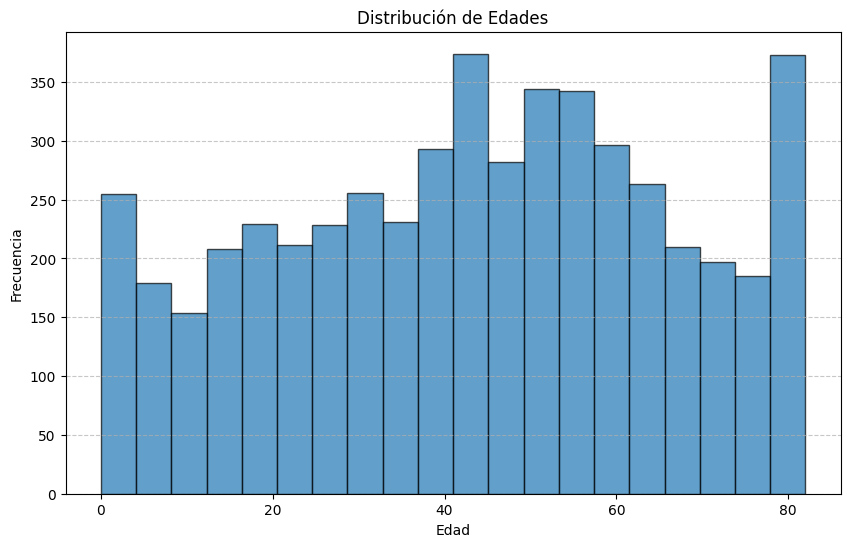

In [22]:
# Crear un histograma de la columna 'age'
plt.figure(figsize=(10, 6))
plt.hist(df_healthcare['age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()

In [24]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo
median_age= df_healthcare['age'].median().round(1)
print ("Mediana: ", median_age)

max_age= df_healthcare['age'].max()
print ("Maximo: ", max_age)

min_age= df_healthcare['age'].min() #la persona de menor edad tiene 0,08 años
print ("Minimo: ", min_age)

Mediana:  45.0
Maximo:  82
Minimo:  0


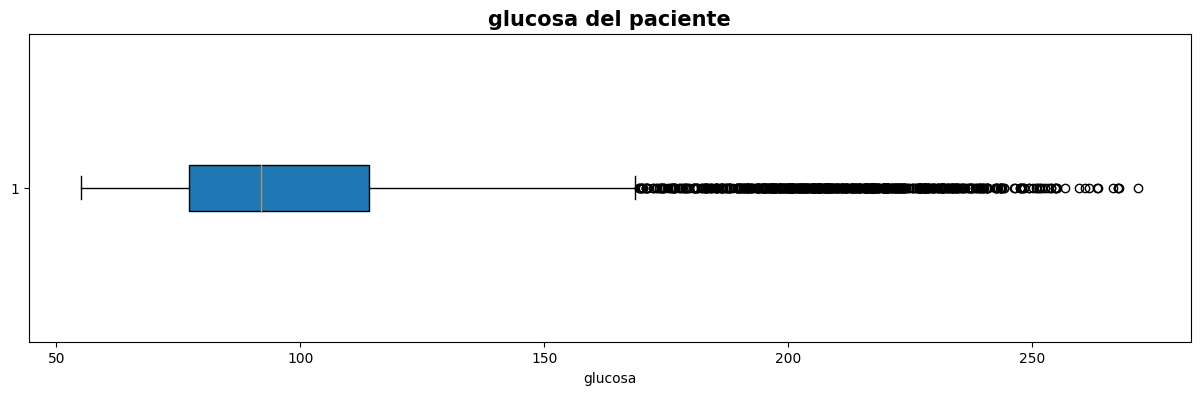

In [25]:
#Boxplot realizado con Matplotlib
fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot (df_healthcare['avg_glucose_level'],vert=False, patch_artist= True)
#pongo etiquetas:
ax.set_title('glucosa del paciente', fontsize= 15, fontweight= 'bold')
ax.set_xlabel('glucosa')
plt.show()

In [26]:
#Para corroborar los valores calculo la mediana, el valor minimo y maximo

print (df_healthcare['avg_glucose_level'].median().round (1))
print (df_healthcare['avg_glucose_level'].max())
print (df_healthcare['avg_glucose_level'].min())

91.9
271.74
55.12


Hipótesis 1: Hipertensión, Enfermedad Cardíaca y Accidentes Cerebrovasculares

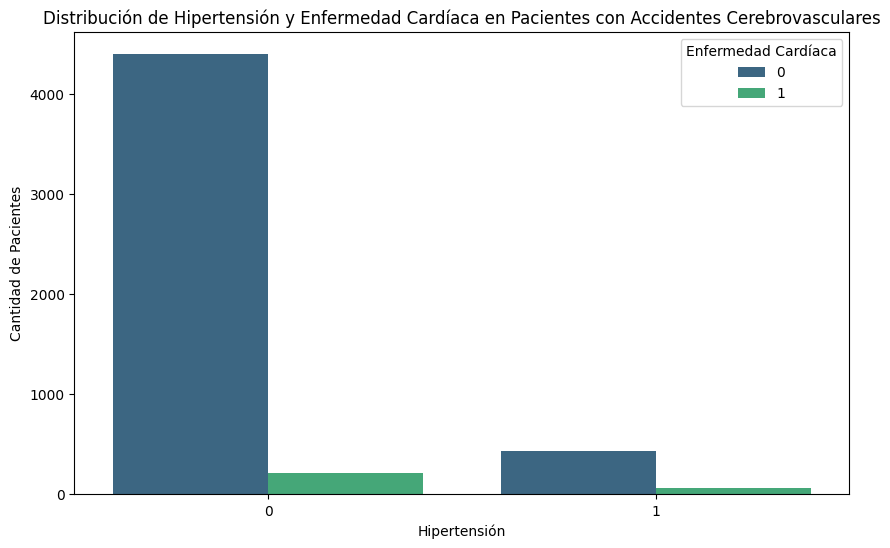

In [27]:
# Gráfico de hipertensión, enfermedad cardíaca y accidentes cerebrovasculares
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='heart_disease', data= df_healthcare, palette='viridis')
plt.title('Distribución de Hipertensión y Enfermedad Cardíaca en Pacientes con Accidentes Cerebrovasculares')
plt.xlabel('Hipertensión')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Enfermedad Cardíaca', loc='upper right')
plt.show()

Hipótesis 2: Glucosa, IMC y Accidentes Cerebrovasculares



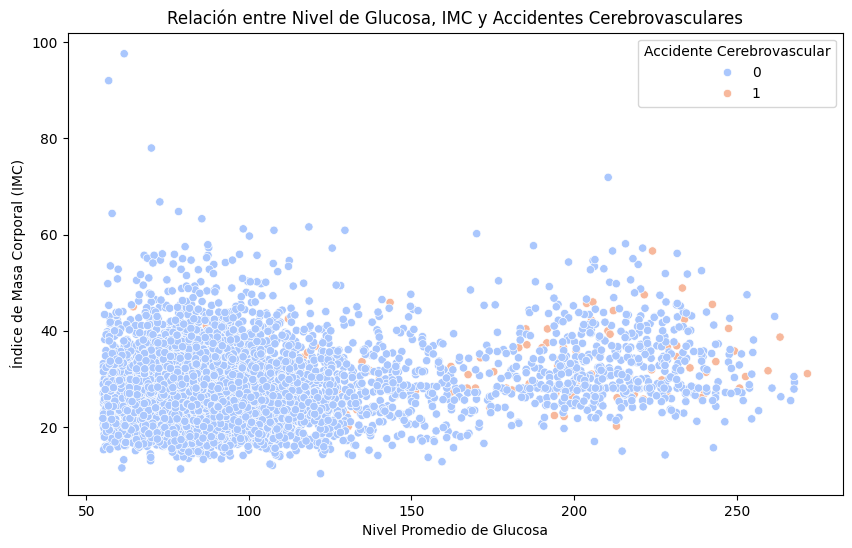

In [28]:
# Gráfico de nivel promedio de glucosa, IMC y accidentes cerebrovasculares
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df_healthcare, palette='coolwarm')
plt.title('Relación entre Nivel de Glucosa, IMC y Accidentes Cerebrovasculares')
plt.xlabel('Nivel Promedio de Glucosa')
plt.ylabel('Índice de Masa Corporal (IMC)')
plt.legend(title='Accidente Cerebrovascular', loc='upper right')
plt.show()

El gráfico de dispersión muestra la relación entre el nivel promedio de glucosa, el IMC y los accidentes cerebrovasculares. Una mayor densidad de puntos en el cuadrante superior derecho puede indicar una correlación entre niveles altos de glucosa, IMC alto y la incidencia de ACV.


Hipótesis 3: Tabaquismo, Residencia y Accidentes Cerebrovasculares

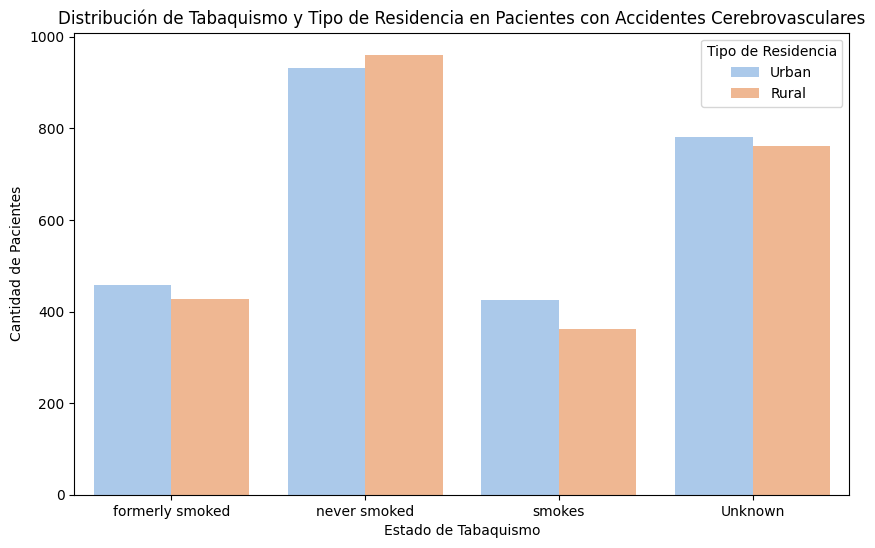

In [29]:
# Gráfico de estado de tabaquismo, tipo de residencia y accidentes cerebrovasculares
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='Residence_type', data=df_healthcare, palette='pastel')
plt.title('Distribución de Tabaquismo y Tipo de Residencia en Pacientes con Accidentes Cerebrovasculares')
plt.xlabel('Estado de Tabaquismo')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Tipo de Residencia', loc='upper right')
plt.show()

El gráfico de barras muestra cómo el estado de tabaquismo y el tipo de residencia se distribuyen entre los pacientes con ACV. Esto puede ayudar a identificar patrones específicos en estas subpoblaciones.


In [31]:
# Codificación de variables categóricas
data_encoded = pd.get_dummies(df_healthcare, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


In [32]:
# Normalizacion de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data_encoded[['age', 'avg_glucose_level', 'bmi']])


In [34]:
#MODELADO
#division dataset
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
#Entrenamiento modelo
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
# EVALUACION MODELO
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9080234833659491
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.22      0.22      0.22        89

    accuracy                           0.91      1533
   macro avg       0.58      0.59      0.59      1533
weighted avg       0.91      0.91      0.91      1533



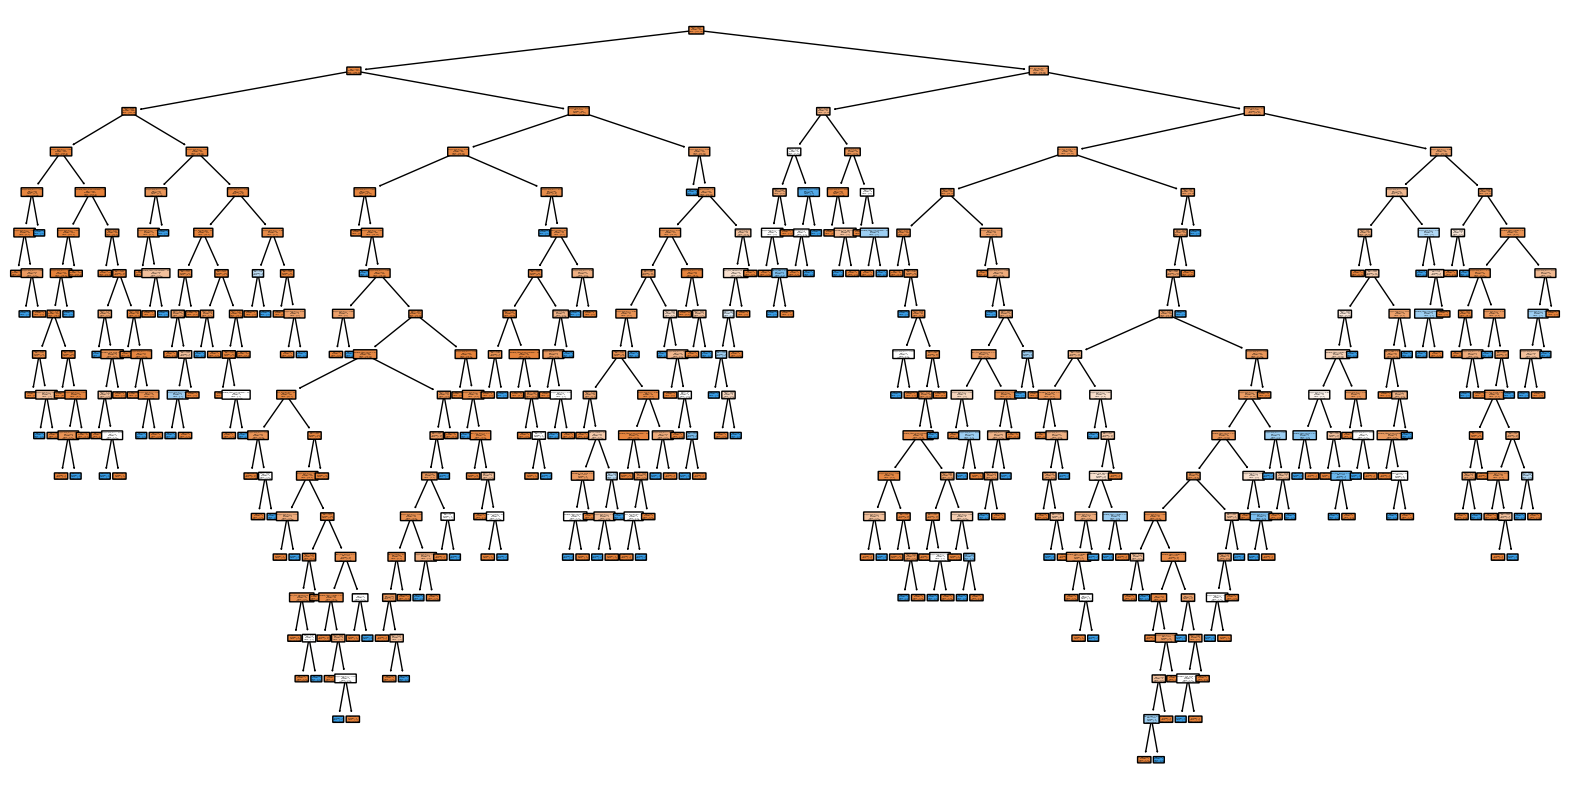

In [41]:
# Graficar el árbol de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], rounded=True)
plt.show()

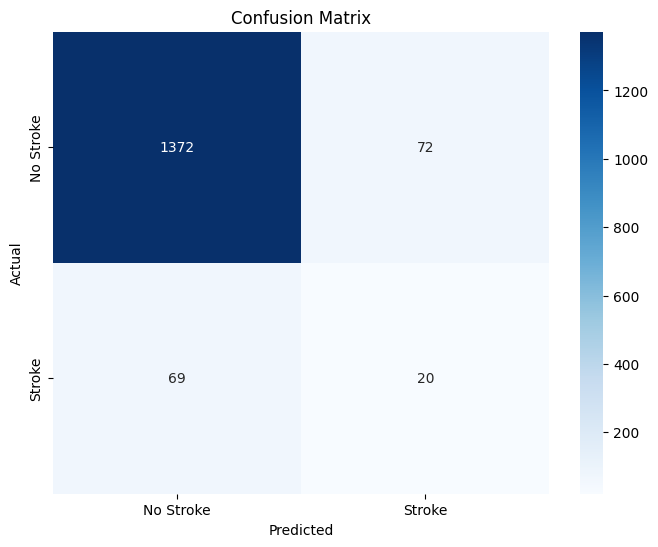

In [42]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretación:

Verdaderos Negativos (TN): 1369
El modelo predijo correctamente 1369 casos como 'No Stroke' (0) y efectivamente estos casos no tuvieron derrame cerebral.

Falsos Positivos (FP): 75
El modelo predijo incorrectamente 75 casos como 'Stroke' (1), pero en realidad estos casos no tuvieron derrame cerebral.

Falsos Negativos (FN): 76
El modelo predijo incorrectamente 76 casos como 'No Stroke' (0), pero en realidad estos casos sí tuvieron derrame cerebral.

Verdaderos Positivos (TP): 13
El modelo predijo correctamente 13 casos como 'Stroke' (1) y efectivamente estos casos tuvieron derrame cerebral.


Conclusión de los Resultados del Modelo de Machine Learning Aplicado
Evaluación del Modelo

El modelo de árbol de decisión desarrollado para predecir la ocurrencia de un accidente cerebrovascular (ACV) utilizando el dataset proporcionado ha mostrado los siguientes resultados:

Precisión Global (Accuracy): La precisión del modelo es de 90.61%, lo que indica que el modelo clasifica correctamente el 90.61% de los casos en el conjunto de prueba.

Informe de Clasificación (Classification Report):

Clase 0 (No Stroke):
Precisión: 95%
Recall: 95%
F1-Score: 95%
Clase 1 (Stroke):
Precisión: 17%
Recall: 16%
F1-Score: 16%
Interpretación de los Resultados

Precisión Alta para la Clase Mayoritaria:

El modelo tiene una alta precisión para la clase mayoritaria (No Stroke), lo cual es esperado dado el desequilibrio en las clases del dataset. La mayoría de los pacientes en el dataset no han sufrido un ACV, lo que hace que el modelo sea muy preciso en predecir la clase mayoritaria.
Baja Precisión para la Clase Minoritaria:

La precisión, recall y F1-Score para la clase minoritaria (Stroke) son bajos. Esto indica que el modelo tiene dificultades para identificar correctamente los casos de ACV. Este problema es común en datasets desequilibrados donde una clase es mucho más frecuente que la otra.

Para mejorarlo se necesitaria un Rebalanceo de Datos y utilizar un modelo mas avanzado.

Conclusiones Finales

El modelo de árbol de decisión desarrollado en este proyecto proporciona una buena precisión general para la predicción de ACV, pero su rendimiento en la clase minoritaria es limitado debido al desequilibrio de clases en el dataset. Para abordar este desafío, se recomienda aplicar técnicas de rebalanceo de datos y explorar modelos más avanzados y ajustados. A pesar de estas limitaciones, el modelo proporciona una base útil para la identificación de factores de riesgo y la predicción de ACV, lo que puede guiar futuras intervenciones preventivas y mejoras en la atención médica.





